# Diabetes - Pima Indians

## Introduction

In this diabetes classification project, I aim to predict whether a patient has diabetes (1) or not (0) based on several health indicators. The dataset includes features such as the number of pregnancies, glucose level, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function (which represents the likelihood of diabetes based on family history), and age. By analyzing these variables, I will build a machine learning model to classify patients into diabetic or non-diabetic categories, using the "Outcome" variable as the target for prediction.

## Importing Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model evaluation (classification)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc

# Model evaluation (regression)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cross-validation and hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Additional tuning libraries for polynomial regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Warnings
import warnings
warnings.filterwarnings("ignore")


## Loading Data

**For more information [here](https://www.kaggle.com/datasets/nancyalaswad90/review)**

In [ ]:
!kaggle datasets download -d nancyalaswad90/review

Dataset URL: https://www.kaggle.com/datasets/nancyalaswad90/review
License(s): CC0-1.0
review.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip data
!unzip review.zip

Archive:  review.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Read Data
df = pd.read_csv('diabetes.csv')

# First 10 rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It seems that data has some issues. As some columns has values of 0 which doesn't make sense (such as 'Insulin' & 'SkinThickness')

## Data Cleaning

In this section i'll deal with:
* Null values.
* Outliers.

In [ ]:
# Replace 0 with null on all columns except 'Pregnancies' and 'Outcome'
to_replace = [col for col in df.columns if col not in ['Pregnancies', 'Outcome']]
df[to_replace] = df[to_replace].replace(0, np.nan)

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# Data statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.834635,121.698927,72.405184,28.985213,148.705584,31.850330,0.470348,33.240885,0.348958
std,3.336808,30.473420,12.382158,9.880572,95.858779,5.750244,0.323411,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,122.000000,50.000000,400.000000,40.000000,2.000000,81.000000,1.000000


In [ ]:
# percentages of null values on columns
per_null = df.isnull().sum() / len(df) * 100
per_null

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


As i'll use models for filling null values. I'll treat outlies first.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Columns to explore
to_explore = [col for col in df.columns if col not in ['output']]

for column in to_explore:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)

    # Create subplots: 1 row, 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{column} - Boxplot', f'{column} - Distplot'))

    # Boxplot
    fig.add_trace(go.Box(
        y=df[column],
        name='Boxplot',
        boxmean='sd'
    ), row=1, col=1)

    # Distplot (Density Plot)
    fig.add_trace(go.Histogram(
        x=df[column],
        name='Distplot',
        histnorm='probability density',
        nbinsx=30,
        opacity=0.6,
        marker_color='skyblue'
    ), row=1, col=2)

    # Add annotations to Boxplot
    fig.add_annotation(
        x=1,  # Center of the boxplot
        y=df[column].max(),
        text=f'No Outliers: {outlier_count}',
        showarrow=False,
        arrowhead=2,
        ax=0,
        ay=-50,
        xref='x1',
        yref='y1'
    )

    # Update layout
    fig.update_layout(
        title=f'Interactive Plot for {column}',
        xaxis_title='Values',
        yaxis_title='Density',
        xaxis2_title='Values',
        yaxis2_title='Density',
        height=600,
        width=1000,
        showlegend=False
    )

    # Show plot
    fig.show()


In [ ]:
# assign upper bound 13 to any higher value in pregnancies
df.loc[df['Pregnancies'] > 13, 'Pregnancies'] = 13

BloodPressure is in the normal range, even some points outside boxplot. No action will be taken.

In [ ]:
# assign a value of 50 to any higher value in SkinThickness (as 50 considered an accepted upper value)
df.loc[df['SkinThickness'] > 50, 'SkinThickness'] = 50

In [ ]:
# assign a value of 400 for any higher in Insuline (as all refere to exteme diabetes conditions)
df.loc[df['Insulin'] > 400, 'Insulin'] = 400

In [ ]:
# assign a value of 40 for any higher value in BMI. As 40 is the value in extreme obesity (even there is no theoritical upper bound)
df.loc[df['BMI'] > 40, 'BMI'] = 40

In [ ]:
# assign a value of 2 to any higher in DiabetesPedigreeFunction (as 2 considered an upper bound for the feature)
df.loc[df['DiabetesPedigreeFunction'] > 2, 'DiabetesPedigreeFunction'] = 2

Values outside 'Age' box plot considered normal for age range. So, no action will be taken.

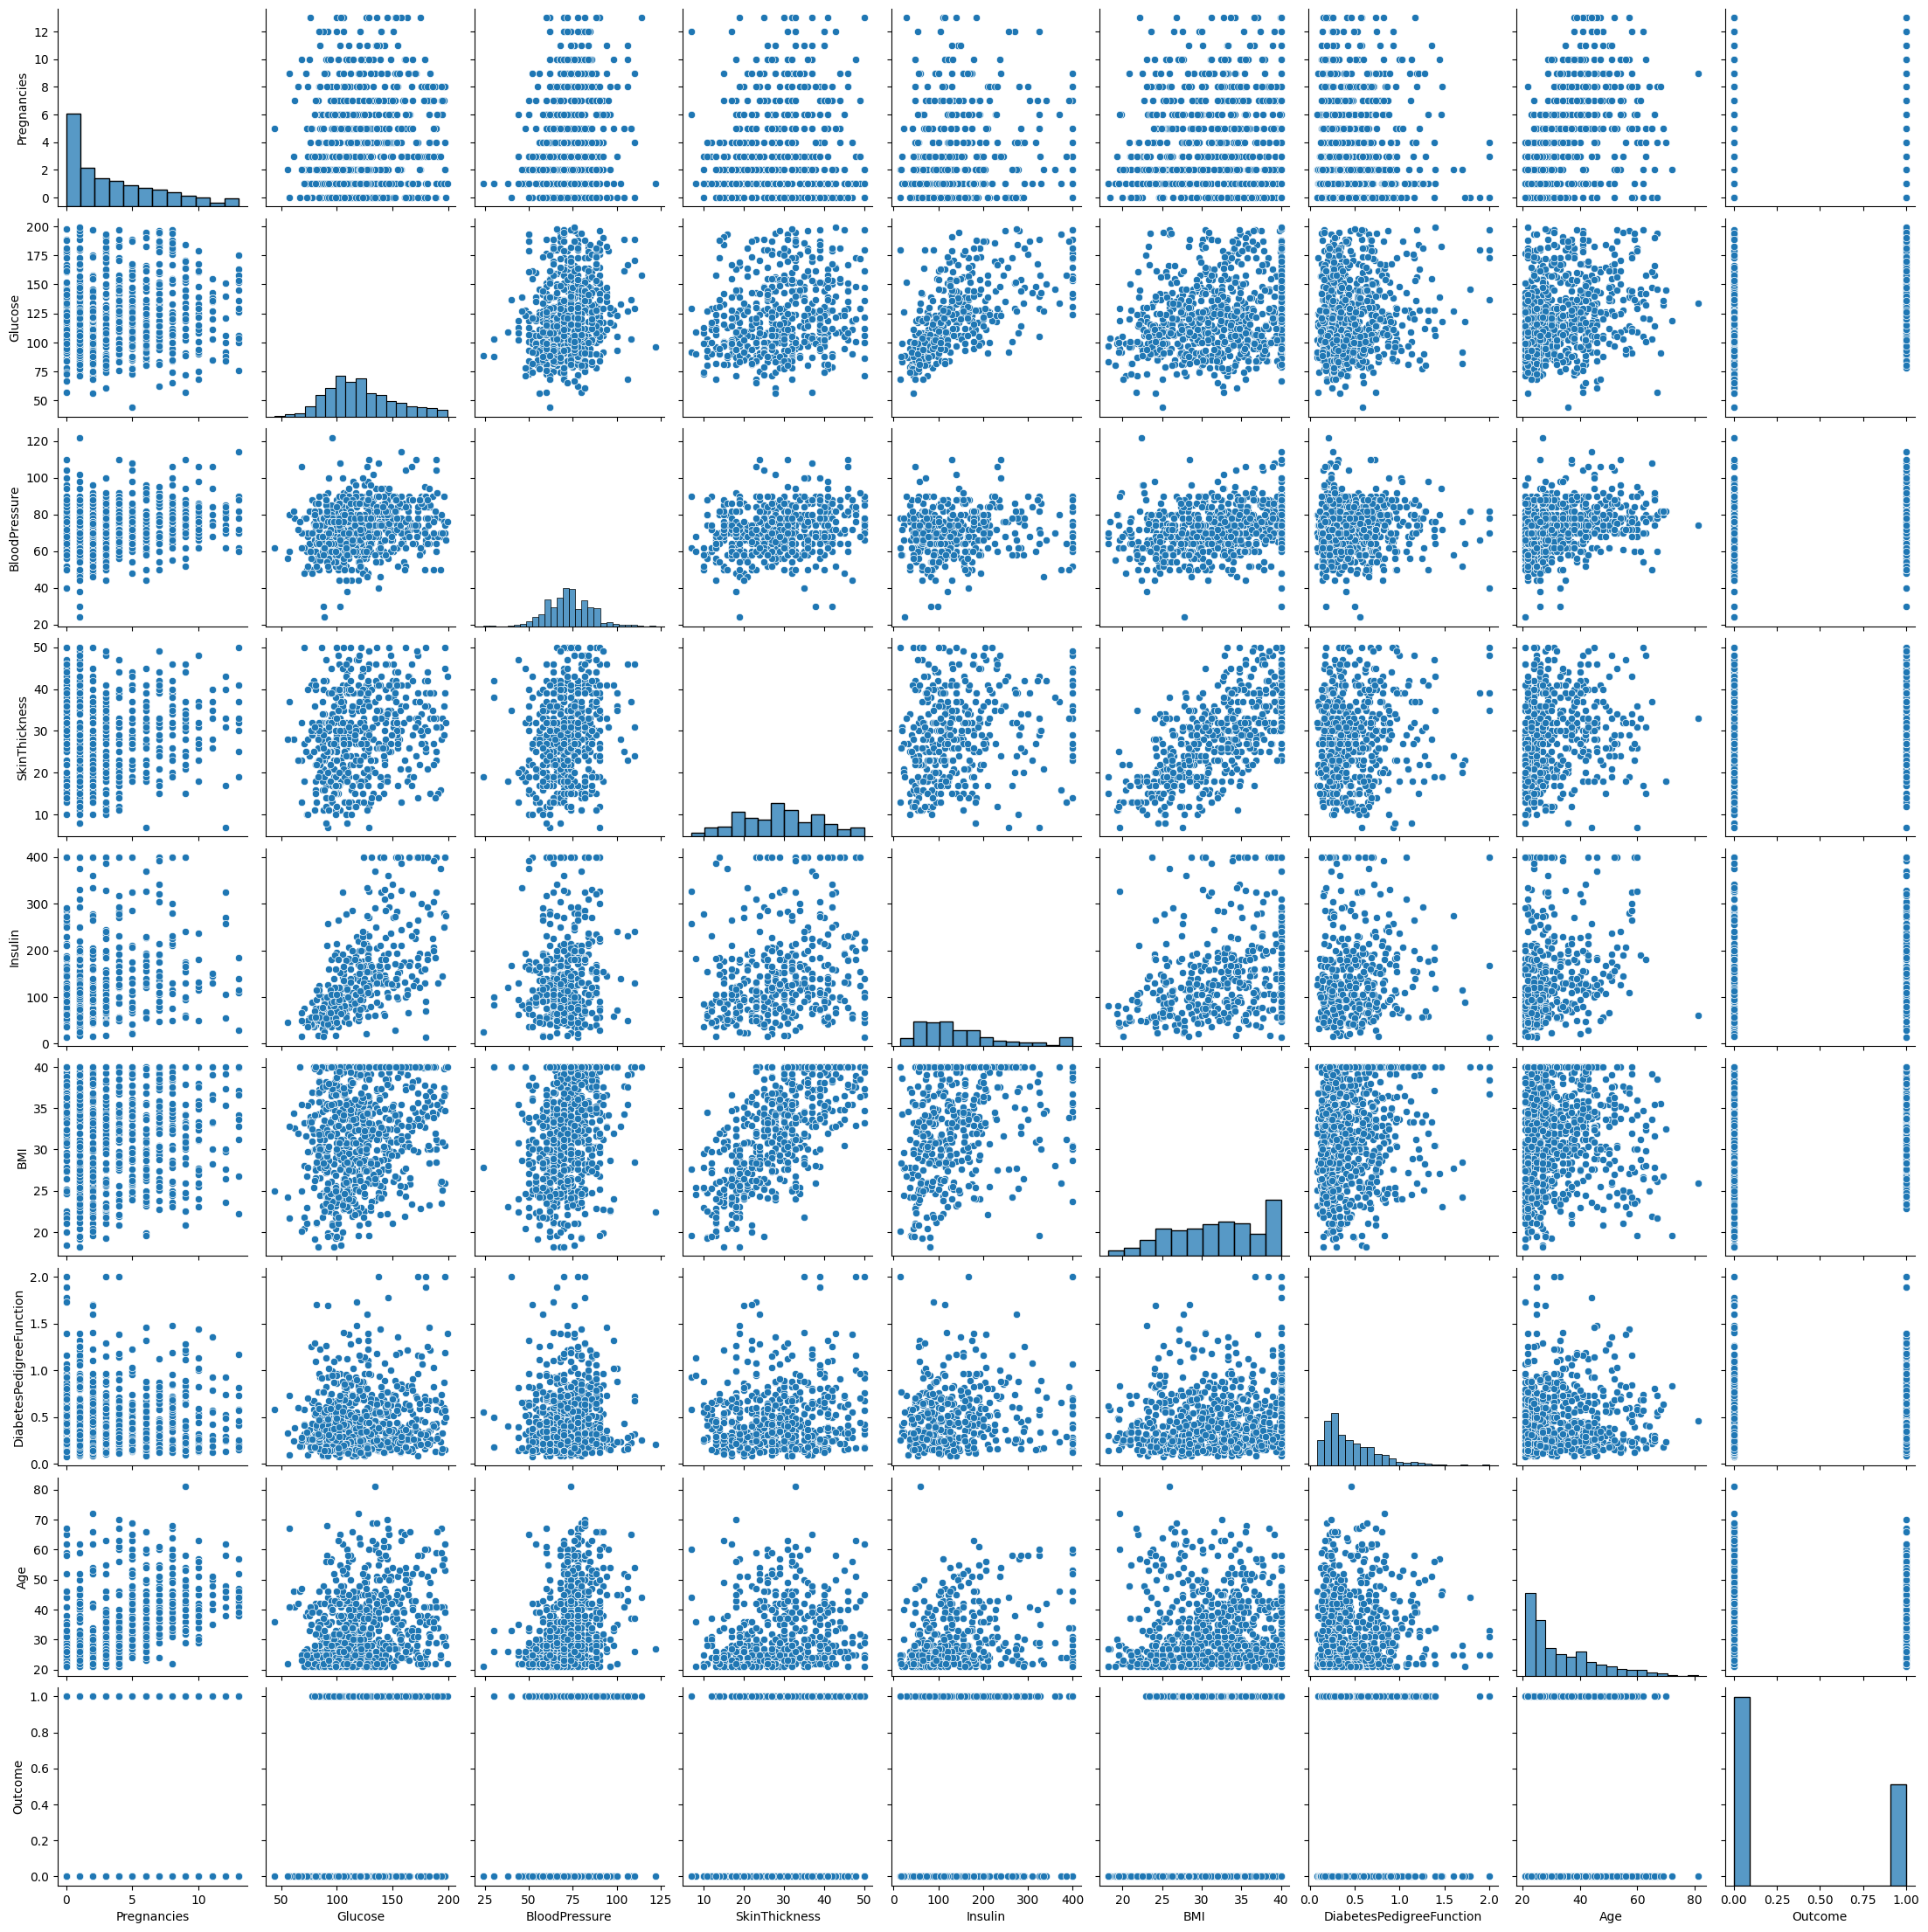

In [ ]:
# explore data to try expect suitable model using pairplot
sns.pairplot(df)

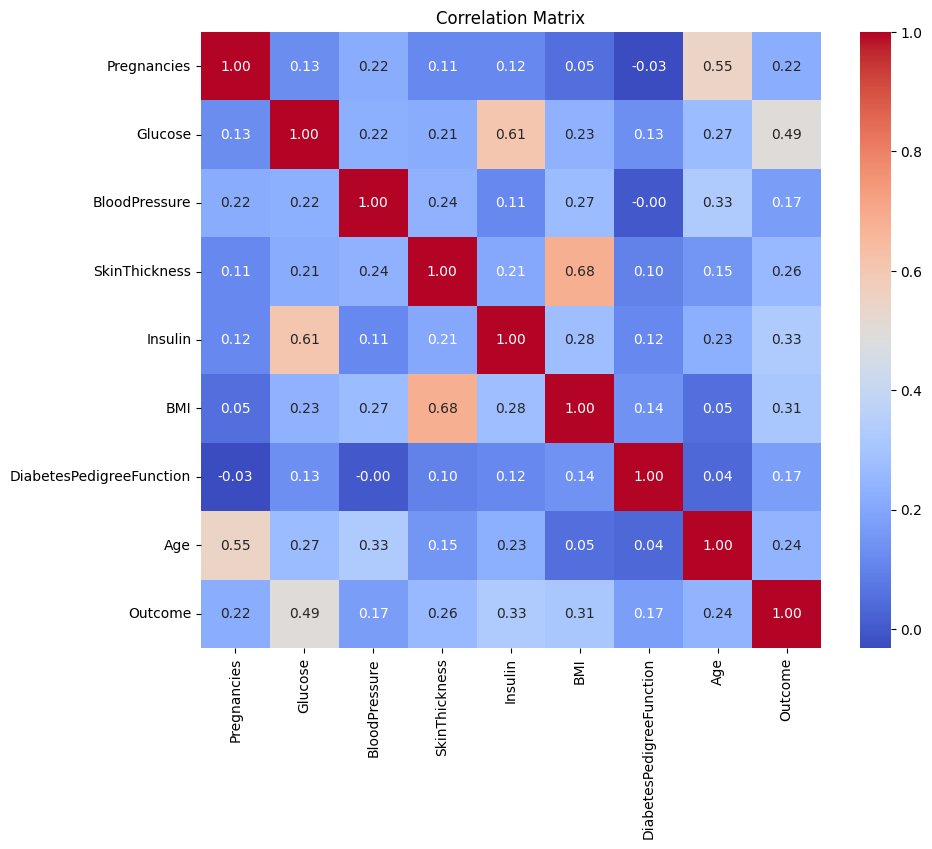

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Now, i'll start treating null values**


I'll start treating null values from smallest to largest percentages.

In [ ]:
# Preg bins and labels
custom_bins = [-0.01, 5, 10, 13]
custom_labels = ['0-5', '5-10', '10-13']
# Create a new column 'preg_group'
df['preg_group'] = pd.cut(df['Pregnancies'], bins=custom_bins, labels=custom_labels)

# DiabetesPedigreeFunction bins and labels
custom_bins = [0, 1, 2]
custom_labels = ['0-1', '1-2']
# Create a new column 'DiabetesPedigreeFunction_group'
df['DiabetesPedigreeFunction_group'] = pd.cut(df['DiabetesPedigreeFunction'], bins=custom_bins, labels=custom_labels)

# Age	 bins and labels
custom_bins = [20, 40,60,81]
custom_labels = ['20-40','40-60','60-81']
# Create a new column 'Age_group'
df['Age_group'] = pd.cut(df['Age'], bins=custom_bins, labels=custom_labels)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,preg_group,DiabetesPedigreeFunction_group,Age_group
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,5-10,0-1,40-60
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,0-5,0-1,20-40
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,5-10,0-1,20-40
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0-5,0-1,20-40
4,0,137.0,40.0,35.0,168.0,40.0,2.000,33,1,0-5,1-2,20-40
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,0-5,0-1,20-40
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,0-5,0-1,20-40
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,5-10,0-1,20-40
8,2,197.0,70.0,45.0,400.0,30.5,0.158,53,1,0-5,0-1,40-60
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,5-10,0-1,40-60


In [ ]:
# group the data according to Outcome	glu_group using DiabetesPedigreeFunction_group,	Age_group,outcome,preg_group
glu_group = df.groupby(['Outcome', 'preg_group', 'DiabetesPedigreeFunction_group', 'Age_group'])['Glucose'].mean()

In [ ]:
glu_group

Outcome  preg_group  DiabetesPedigreeFunction_group  Age_group
0        0-5         0-1                             20-40        108.554252
                                                     40-60        111.650000
                                                     60-81        129.272727
                     1-2                             20-40        108.642857
                                                     40-60        146.333333
                                                     60-81               NaN
         5-10        0-1                             20-40        113.021739
                                                     40-60        109.666667
                                                     60-81        132.750000
                     1-2                             20-40        115.000000
                                                     40-60        146.666667
                                                     60-81               NaN
         10-13       0-1                             20-40        111.500000
                                                     40-60        109.700000
                                                     60-81        121.000000
                     1-2                             20-40        153.000000
                                                     40-60               NaN
                                                     60-81               NaN
1        0-5         0-1                             20-40        141.287037
                                                     40-60        141.217391
                                                     60-81        149.500000
                     1-2                             20-40        146.866667
                                                     40-60        149.750000
                                                     60-81               NaN
         5-10        0-1                             20-40        136.088235
                                                     40-60        150.826087
                                                     60-81        190.000000
                     1-2                             20-40        134.750000
                                                     40-60        141.800000
                                                     60-81               NaN
         10-13       0-1                             20-40        141.250000
                                                     40-60        128.533333
                                                     60-81               NaN
                     1-2                             20-40               NaN
                                                     40-60        155.000000
                                                     60-81               NaN
Name: Glucose, dtype: float64

In [ ]:
# fill null values on Glucose using glu_group
df['Glucose'].fillna(df.apply(lambda x: glu_group[(x['Outcome'], x['preg_group'], x['DiabetesPedigreeFunction_group'], x['Age_group'])], axis=1), inplace=True)

Next, i'll treat BMI

In [ ]:
# create glu_group to use it in grouping for BMI
# Glucose	 bins and labels
custom_bins = [40, 100, 125, 200]      # bins according to ranges for Glucose in human body
custom_labels = ['40-100','100-125','125-200']
# Create a new column 'glu_group'
df['glu_group'] = pd.cut(df['Glucose'], bins=custom_bins, labels=custom_labels)

In [ ]:
# group the data according to Outcome	bmi_group using DiabetesPedigreeFunction_group,	Age_group,outcome,preg_group, glu_group
bmi_group = df.groupby(['Outcome', 'preg_group', 'DiabetesPedigreeFunction_group', 'Age_group', 'glu_group'])['BMI'].mean()

In [ ]:
bmi_group

Outcome  preg_group  DiabetesPedigreeFunction_group  Age_group  glu_group
0        0-5         0-1                             20-40      40-100       29.509420
                                                                100-125      30.665414
                                                                125-200      31.135294
                                                     40-60      40-100       34.700000
                                                                100-125      32.033333
                                                                               ...    
1        10-13       1-2                             40-60      100-125            NaN
                                                                125-200      33.300000
                                                     60-81      40-100             NaN
                                                                100-125            NaN
                                                                125-200            NaN
Name: BMI, Length: 108, dtype: float64

In [ ]:
# fill null values on BMI using bmi_group
df['BMI'].fillna(df.apply(lambda x: bmi_group[(x['Outcome'], x['preg_group'], x['DiabetesPedigreeFunction_group'], x['Age_group'],x['glu_group'])], axis=1), inplace=True)

Next, i'll treat BloodPressure column. As BMI has no high effect on BloodPressure, i'll not make any new column and use existing ones.

In [ ]:
# group the data to bp_group using DiabetesPedigreeFunction_group,	Age_group,outcome,preg_group, glu_group
bp_group = df.groupby(['Outcome', 'preg_group', 'DiabetesPedigreeFunction_group', 'Age_group', 'glu_group'])['BloodPressure'].mean()

In [ ]:
# printing BloodPressure from bp_group
bp_group[0]

preg_group  DiabetesPedigreeFunction_group  Age_group  glu_group
0-5         0-1                             20-40      40-100        67.105263
                                                       100-125       68.007519
                                                       125-200       74.029412
                                            40-60      40-100        77.600000
                                                       100-125       82.500000
                                                       125-200       80.400000
                                            60-81      40-100        60.000000
                                                       100-125      108.000000
                                                       125-200       72.500000
            1-2                             20-40      40-100        69.500000
                                                       100-125       64.000000
                                                       125-200       69.000000
                                            40-60      40-100              NaN
                                                       100-125       80.000000
                                                       125-200       80.000000
                                            60-81      40-100              NaN
                                                       100-125             NaN
                                                       125-200             NaN
5-10        0-1                             20-40      40-100        72.333333
                                                       100-125       72.750000
                                                       125-200       75.000000
                                            40-60      40-100        73.062500
                                                       100-125       74.200000
                                                       125-200       79.400000
                                            60-81      40-100        82.000000
                                                       100-125       80.666667
                                                       125-200       72.000000
            1-2                             20-40      40-100              NaN
                                                       100-125       98.000000
                                                       125-200             NaN
                                            40-60      40-100              NaN
                                                       100-125       72.000000
                                                       125-200       87.000000
                                            60-81      40-100              NaN
                                                       100-125             NaN
                                                       125-200             NaN
10-13       0-1                             20-40      40-100        74.000000
                                                       100-125             NaN
                                                       125-200       76.000000
                                            40-60      40-100        72.666667
                                                       100-125       72.500000
                                                       125-200       91.000000
                                            60-81      40-100              NaN
                                                       100-125       78.000000
                                                       125-200             NaN
            1-2                             20-40      40-100              NaN
                                                       100-125             NaN
                                                       125-200       88.000000
                                            40-60      40-100              NaN
                                                       100-125  

In [ ]:
# filling null BloodPressure according to bp_group
df['BloodPressure'].fillna(df.apply(lambda x: bp_group[(x['Outcome'], x['preg_group'], x['DiabetesPedigreeFunction_group'], x['Age_group'],x['glu_group'])], axis=1), inplace=True)

For SkinThickness i'll use regression model to predict missing values. I'll use BMI as feature for the model as it has high relation with skinthickness.

In [ ]:
# define X,y data
X_sk = df[df['SkinThickness'].notnull()]['BMI'].to_numpy().reshape(-1, 1)
y_sk = df[df['SkinThickness'].notnull()]['SkinThickness']

# split data to train_sk, test_sk
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_sk, y_sk, test_size=0.2, random_state=42)

# create regression model
model_sk = LinearRegression()

# fit the model
model_sk.fit(X_train_sk, y_train_sk)

# make predictions
y_pred_sk = model_sk.predict(X_test_sk)

# evaluate model
mse_sk = mean_squared_error(y_test_sk, y_pred_sk)
r2_sk = r2_score(y_test_sk, y_pred_sk)

print(f"Mean Squared Error: {mse_sk}")
print(f"R-squared: {r2_sk}")

Mean Squared Error: 54.781379449818246
R-squared: 0.533927900381038


In [ ]:
# predict null values in SkinThickness using model_sk
df.loc[df['SkinThickness'].isnull(), 'SkinThickness'] = model_sk.predict(df[df['SkinThickness'].isnull()]['BMI'].to_numpy().reshape(-1, 1))

For Insulin, i'll use the same technique as skinthickness. But here i'll use only Glucose as feature

In [141]:
# define X,y data
X_ins = df[df['Insulin'].notnull()]['Glucose'].to_numpy().reshape(-1, 1)
y_ins = df[df['Insulin'].notnull()]['Insulin']

# split data to train_sk, test_sk
X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_ins, y_ins, test_size=0.2, random_state=42)

# create regression model
model_ins = LinearRegression()

# fit the model
model_ins.fit(X_train_ins, y_train_ins)

# make predictions
y_pred_ins = model_ins.predict(X_test_ins)

# evaluate model
mse_ins = mean_squared_error(y_test_ins, y_pred_ins)
r2_ins = r2_score(y_test_ins, y_pred_ins)

print(f"Mean Squared Error: {mse_ins}")
print(f"R-squared: {r2_ins}")

Mean Squared Error: 5972.411557876656
R-squared: 0.43091455843865367


In [142]:
# fill null of Insulin using linear model
df.loc[df['Insulin'].isnull(), 'Insulin'] = model_ins.predict(df[df['Insulin'].isnull()]['Glucose'].to_numpy().reshape(-1, 1))

Despite regression models R2 is low, but the data itself was bad and i triied to fill nulls in a reasonable way.

## EDA

In this section i'll try to extract insights from the data through visualization.

All ranges used for intervals on different columns depend on ranges of this feature in human body.

In [167]:
# Insulin bins and labels
custom_bins = [0, 2, 25, 50, 400]
custom_labels = ['0-2', '2-25', '25-50', '>50']
# Create a new column 'ins_group'
df['ins_group'] = pd.cut(df['Insulin'], bins=custom_bins, labels=custom_labels)

# BMI bins and labels
custom_bins = [0, 18.4, 24.9,29.9,  40]
custom_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity']
# Create a new column 'bmi_group'
df['bmi_group'] = pd.cut(df['BMI'], bins=custom_bins, labels=custom_labels)

# BloodPressure bins and labels
custom_bins = [0, 80, 89,120,  122]
custom_labels = ['Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
# Create a new column 'bmi_group'
df['bp_group'] = pd.cut(df['BloodPressure'], bins=custom_bins, labels=custom_labels)

# SkinThickness bins and labels
custom_bins = [0, 10, 20, 30, 50]
custom_labels = ['Low ', 'Normal ', 'High ', 'Extreme ']
# Create a new column 'sk_group'
df['sk_group'] = pd.cut(df['SkinThickness'], bins=custom_bins, labels=custom_labels)


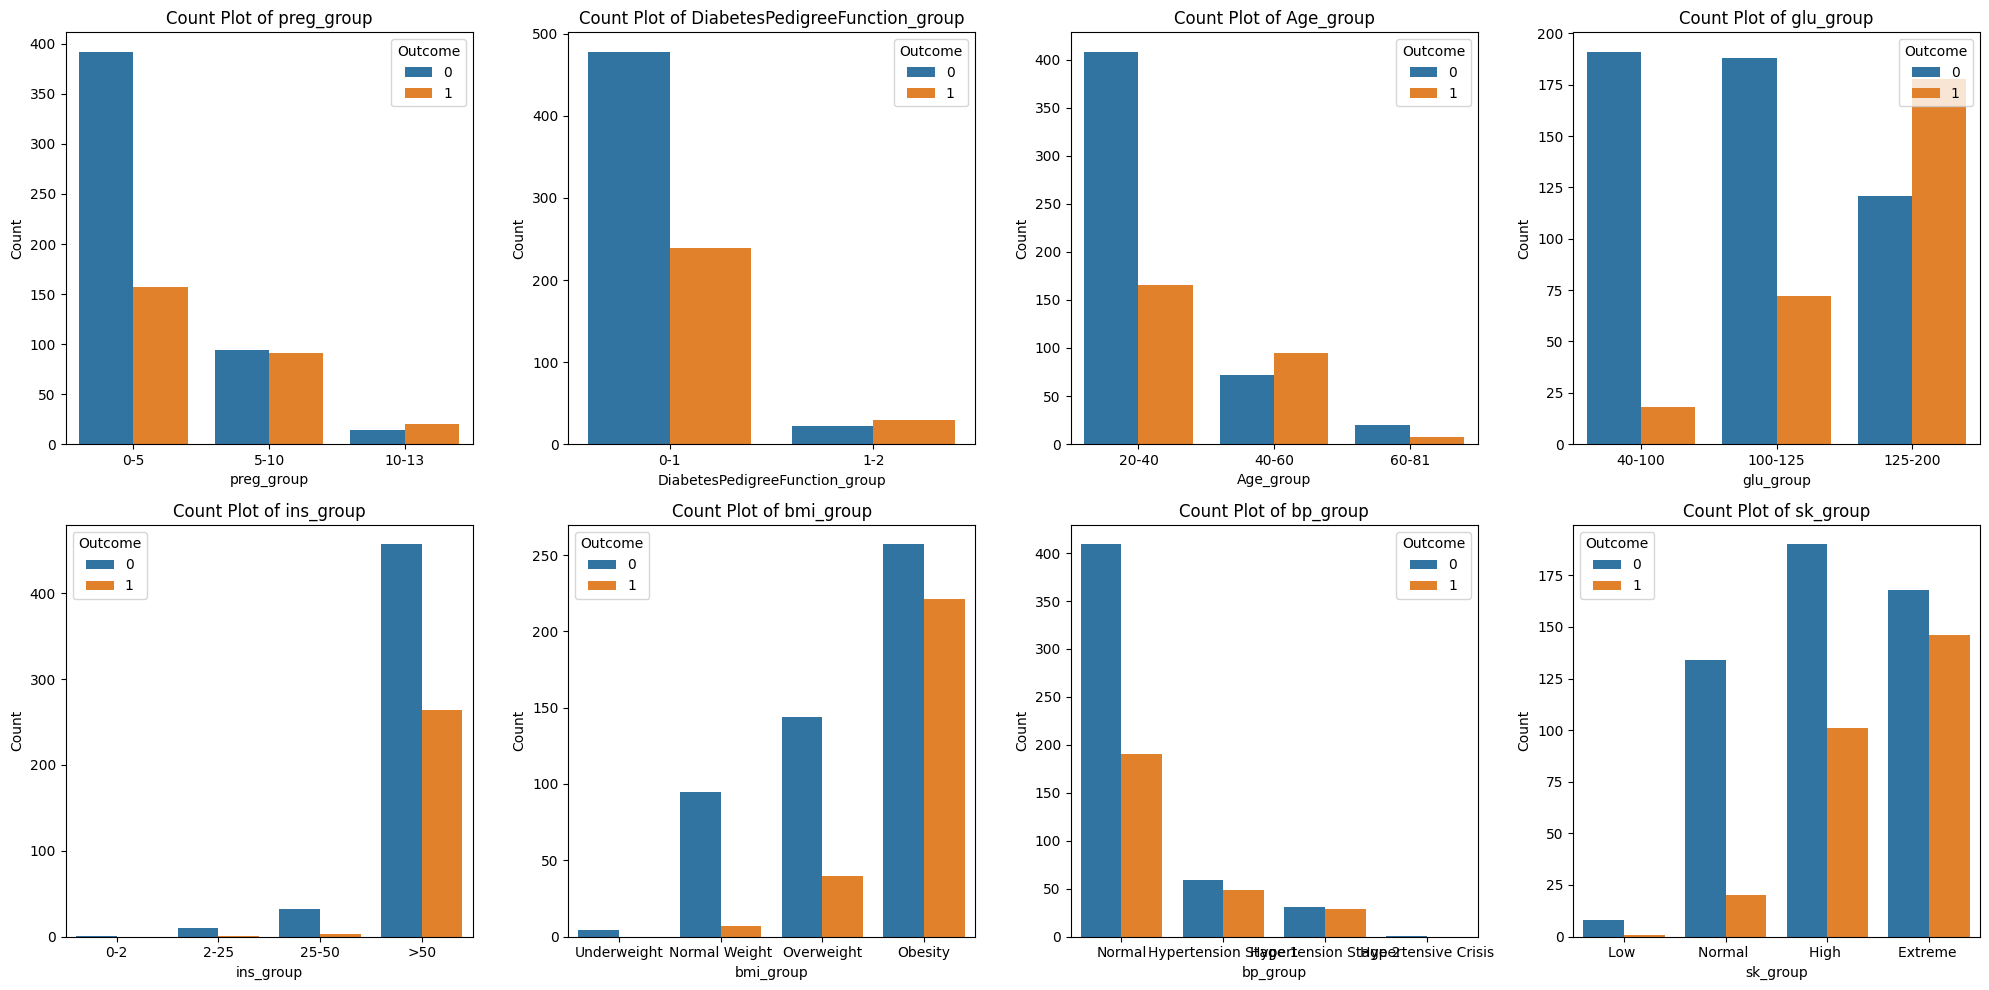

In [170]:
# Columns to plot and hue column
columns_to_plot = ['preg_group', 'DiabetesPedigreeFunction_group', 'Age_group', 'glu_group', 'ins_group', 'bmi_group', 'bp_group', 'sk_group']
hue_column = 'Outcome'

# Set up the subplots: 2 rows and 4 columns
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for ax, col in zip(axes, columns_to_plot):
    sns.countplot(x=col, hue=hue_column, data=df, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove any unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.remove()

plt.tight_layout()
plt.show()

This shows that with increasing number of pregnancies, the probability of diabetes increases.

It seems that the age has no direct effect on diabetes probability, as we see variation in figure for different age intervals in random distribution.

For Glucose the figure shows that it has a high effect on the diabetes probability as it increasing with higher levels of glucose.

For the Diabetes Pedigree Function, values within the normal range (0-1) suggest that the likelihood of diabetes may depend on other factors. However, when the Diabetes Pedigree Function value falls within a higher range (1-2), it indicates a stronger genetic predisposition to diabetes based on family history.

For Insulin and BMI, it seems that they will relate to diabetes at extreme cases. Oherwise their relation almost nothing.

For BloodPressure there is no relation according to this data as in extreme cases the behaviour of the Diabetes doesn't change.

It is obvious that increasing skin thickness is high indicator to increasing probability of diabetes.

## Data Preprocessing

Inthis section i'll perform:
* Data Scalling


In [144]:
# data columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'preg_group',
       'DiabetesPedigreeFunction_group', 'Age_group', 'glu_group'],
      dtype='object')

In [145]:
# define data
X_dia = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y_dia = df['Outcome']

# split data to train and test
X_train_dia,X_test_dia, y_train_dia, y_test_dia =  train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_dia = scaler.fit_transform(X_train_dia)
X_test_dia = scaler.transform(X_test_dia)

## Classification Modeling

Here i'll create classification models to classify Diabetes.

In [146]:
# create classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Loop in models
for model in models:
    model.fit(X_train_dia, y_train_dia)
    y_pred_dia = model.predict(X_test_dia)
    recall = recall_score(y_test_dia, y_pred_dia)

    print(f'{model.__class__.__name__}: Recall = {recall:.4f}')

LogisticRegression: Recall = 0.6364
DecisionTreeClassifier: Recall = 0.6364
RandomForestClassifier: Recall = 0.6727
GradientBoostingClassifier: Recall = 0.6727
AdaBoostClassifier: Recall = 0.6909
SVC: Recall = 0.6000
KNeighborsClassifier: Recall = 0.6545
GaussianNB: Recall = 0.6909
XGBClassifier: Recall = 0.7091


I'm interested in Recall as it's more important for me in Diabetes Classification, as the critical thing is the False Negative (telling the patient that he is healthy while he is thick).

All the models gives near results, with XGBClassifier is the highest.

## Data Profiling

Here i'll explore the importance of features.

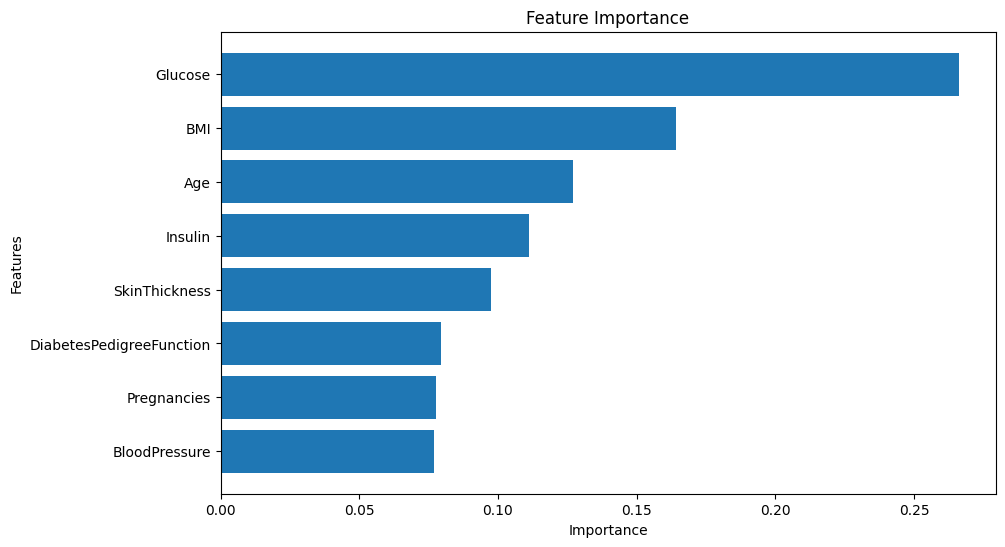

In [152]:
# Fit the XGBClassifier
model = XGBClassifier()
model.fit(X_train_dia, y_train_dia)

# Get feature importances
importances = model.feature_importances_

# Get feature names from the training data
features = X_dia.columns

# Create a DataFrame for better handling and sort by importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the importances in descending order
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

This shows that Glucose has the highest efffect with a high difference from other features.

## Conclusion

In this diabetes classification project, I analyzed key features such as 'Glucose', 'BMI', and 'Age' to predict diabetes outcomes, with feature importance rankings revealing 'Glucose' as the most influential factor. Several machine learning models were tested, including Logistic Regression, Decision Tree, Random Forest, and XGBoost. Among these, XGBClassifier achieved the highest recall of 0.7091, making it the most effective model for identifying true positive diabetes cases, which aligns with my primary goal of maximizing recall to minimize missed diagnoses.